Карпеченко Д.М., dz08, v.0.1, 12.10.2022

In [66]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#Снять ограничения на вывод колонок
pd.set_option('display.max_columns', None)
#Снять ограничения на вывод строк
pd.set_option('display.max_rows', 8)
data = pd.read_excel('D:\TeachMeSkills\DZ\dz8\data1.xlsx')
#Удаляем из набора данных столбец порядкового номера записи
filt_data = data.drop(['No'], axis=1)
###print(filt_data.describe())
#Выведем количество не нулевых и не NAN начений в столбцах
print(filt_data.replace('', np.nan).count())

#Проверяем наши данные на критерий 3 сигм. Хотя для данного дата сета наверное нет особого смысла убирать выбрасы,
#т.к. тут они могут нести с собой полезную информацию.

filt_data=filt_data[(np.abs(stats.zscore(filt_data))<3).all(axis=1)]
filt_data.dropna(inplace=True)

#PS нулевых и нан значений нет




X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64


In [3]:
filt_data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,2013.146192,17.638329,1017.646541,4.149877,24.969113,121.534069,38.094349
std,0.281519,11.423157,1134.448058,2.939395,0.012150,0.014223,12.876574
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,2012.916667,8.900000,289.324800,1.000000,24.963050,121.529810,28.400000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538850,38.800000
75%,2013.416667,27.800000,1414.837000,6.000000,24.977705,121.543480,46.600000
max,2013.583333,43.800000,4605.749000,10.000000,25.001150,121.566270,78.300000


# Построим графики распределений наших данных

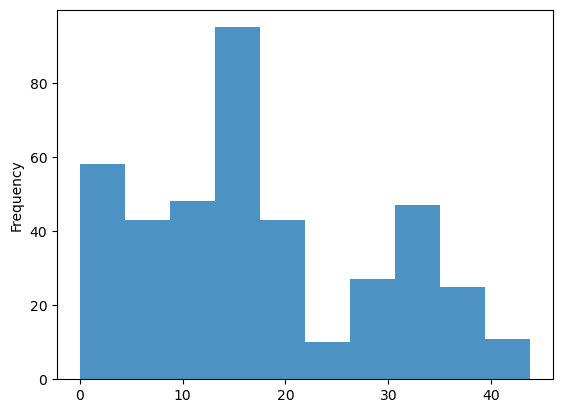

In [24]:
###print(len(filt_data['X2 house age'].value_counts()))
ax = filt_data['X2 house age'].plot.hist(bins=10, alpha=0.8)

253


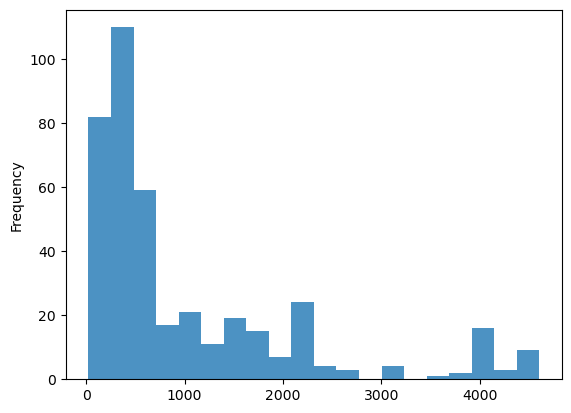

In [28]:
print(len(filt_data['X3 distance to the nearest MRT station'].value_counts()))
ax = filt_data['X3 distance to the nearest MRT station'].plot.hist(bins=20, alpha=0.8)

Все хотят поближе к метро, но непонятный оживляш на 2000 и 4000. 

11


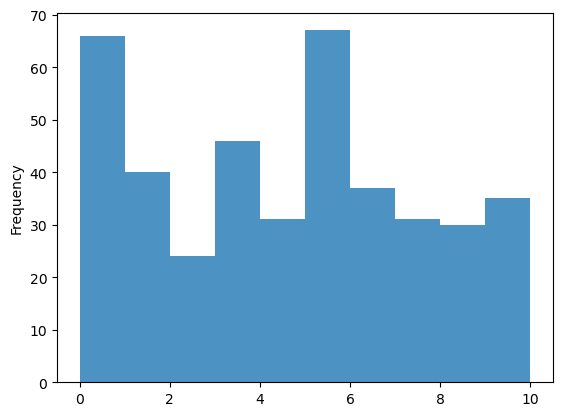

In [35]:
print(len(filt_data['X4 number of convenience stores'].value_counts()))
ax = filt_data['X4 number of convenience stores'].plot.hist(bins=10, alpha=0.8)

Количество магазинов в пешей доступности особо не влияет на выбор квартир

228


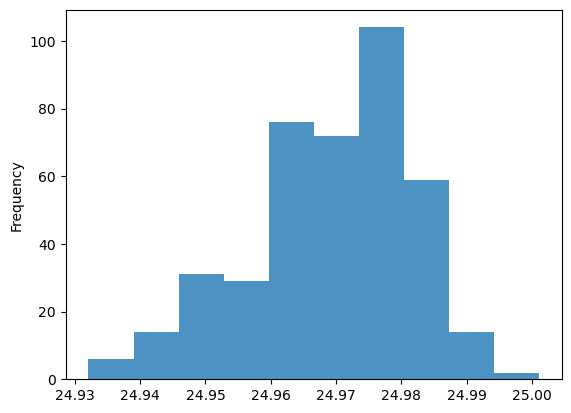

In [26]:
print(len(filt_data['X5 latitude'].value_counts()))
ax = filt_data['X5 latitude'].plot.hist(bins=10, alpha=0.8)

227


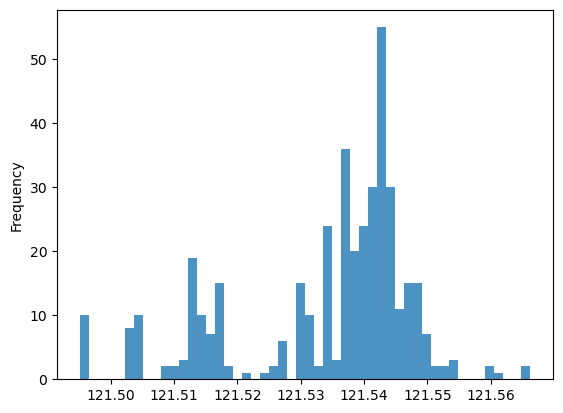

In [17]:
print(len(filt_data['X6 longitude'].value_counts()))
ax = filt_data['X6 longitude'].plot.hist(bins=50, alpha=0.8)

Можно предположить, что все хотят урвать квартиру ближе к центру

266


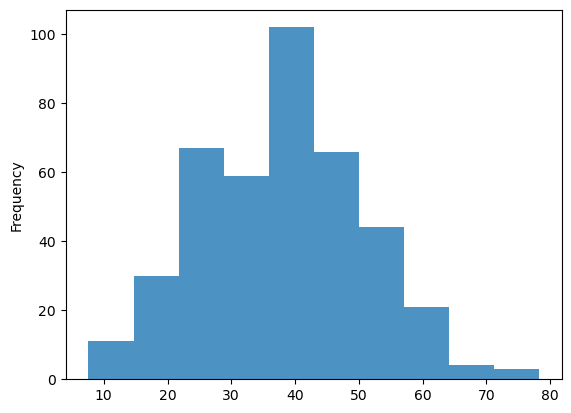

In [27]:
print(len(filt_data['Y house price of unit area'].value_counts()))
ax = filt_data['Y house price of unit area'].plot.hist(bins=10, alpha=0.8)

Распределение по стоимости похоже на нормальное

# Пронормируем наши значения используя StandardScaler(), для сохранения формы нашего распределения. Но для дальнейших пунктов буду использовать не нормированные данные (для большего моего понимания:))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
filt1_data = scaler.fit_transform(filt_data)

C:\Users\HP\anaconda3\envs\My\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


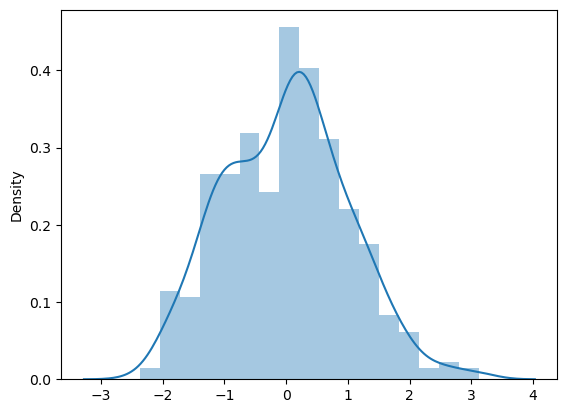

In [46]:
sns.distplot(filt1_data[:,-1], bins = 17);

# Построим таблицу корелляции

In [59]:
corr_matrix = filt_data.corr()
corr_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.014854,0.041092,0.021329,0.030668,-0.022792,0.095603
X2 house age,0.014854,1.000000,-0.007039,0.057119,0.075027,-0.022561,-0.202244
X3 distance to the nearest MRT station,0.041092,-0.007039,1.000000,-0.618373,-0.631557,-0.769217,-0.691075
X4 number of convenience stores,0.021329,0.057119,-0.618373,1.000000,0.458272,0.439598,0.604845
X5 latitude,0.030668,0.075027,-0.631557,0.458272,1.000000,0.408213,0.569685
X6 longitude,-0.022792,-0.022561,-0.769217,0.439598,0.408213,1.000000,0.522886
Y house price of unit area,0.095603,-0.202244,-0.691075,0.604845,0.569685,0.522886,1.000000


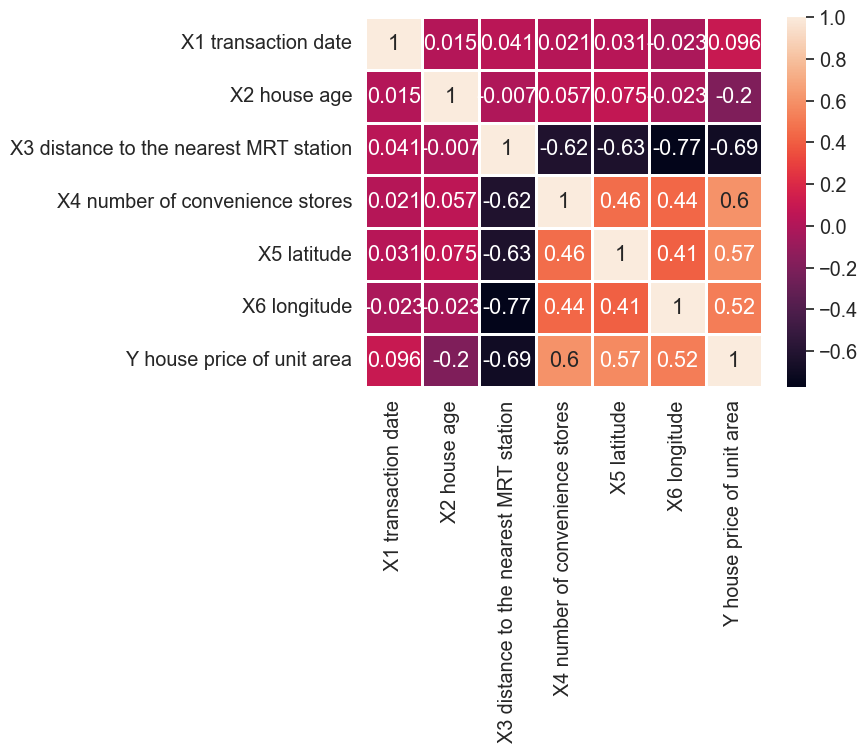

In [57]:
sns.heatmap(corr_matrix, annot=True, linewidths=1);

# Построим графики парных отношений 

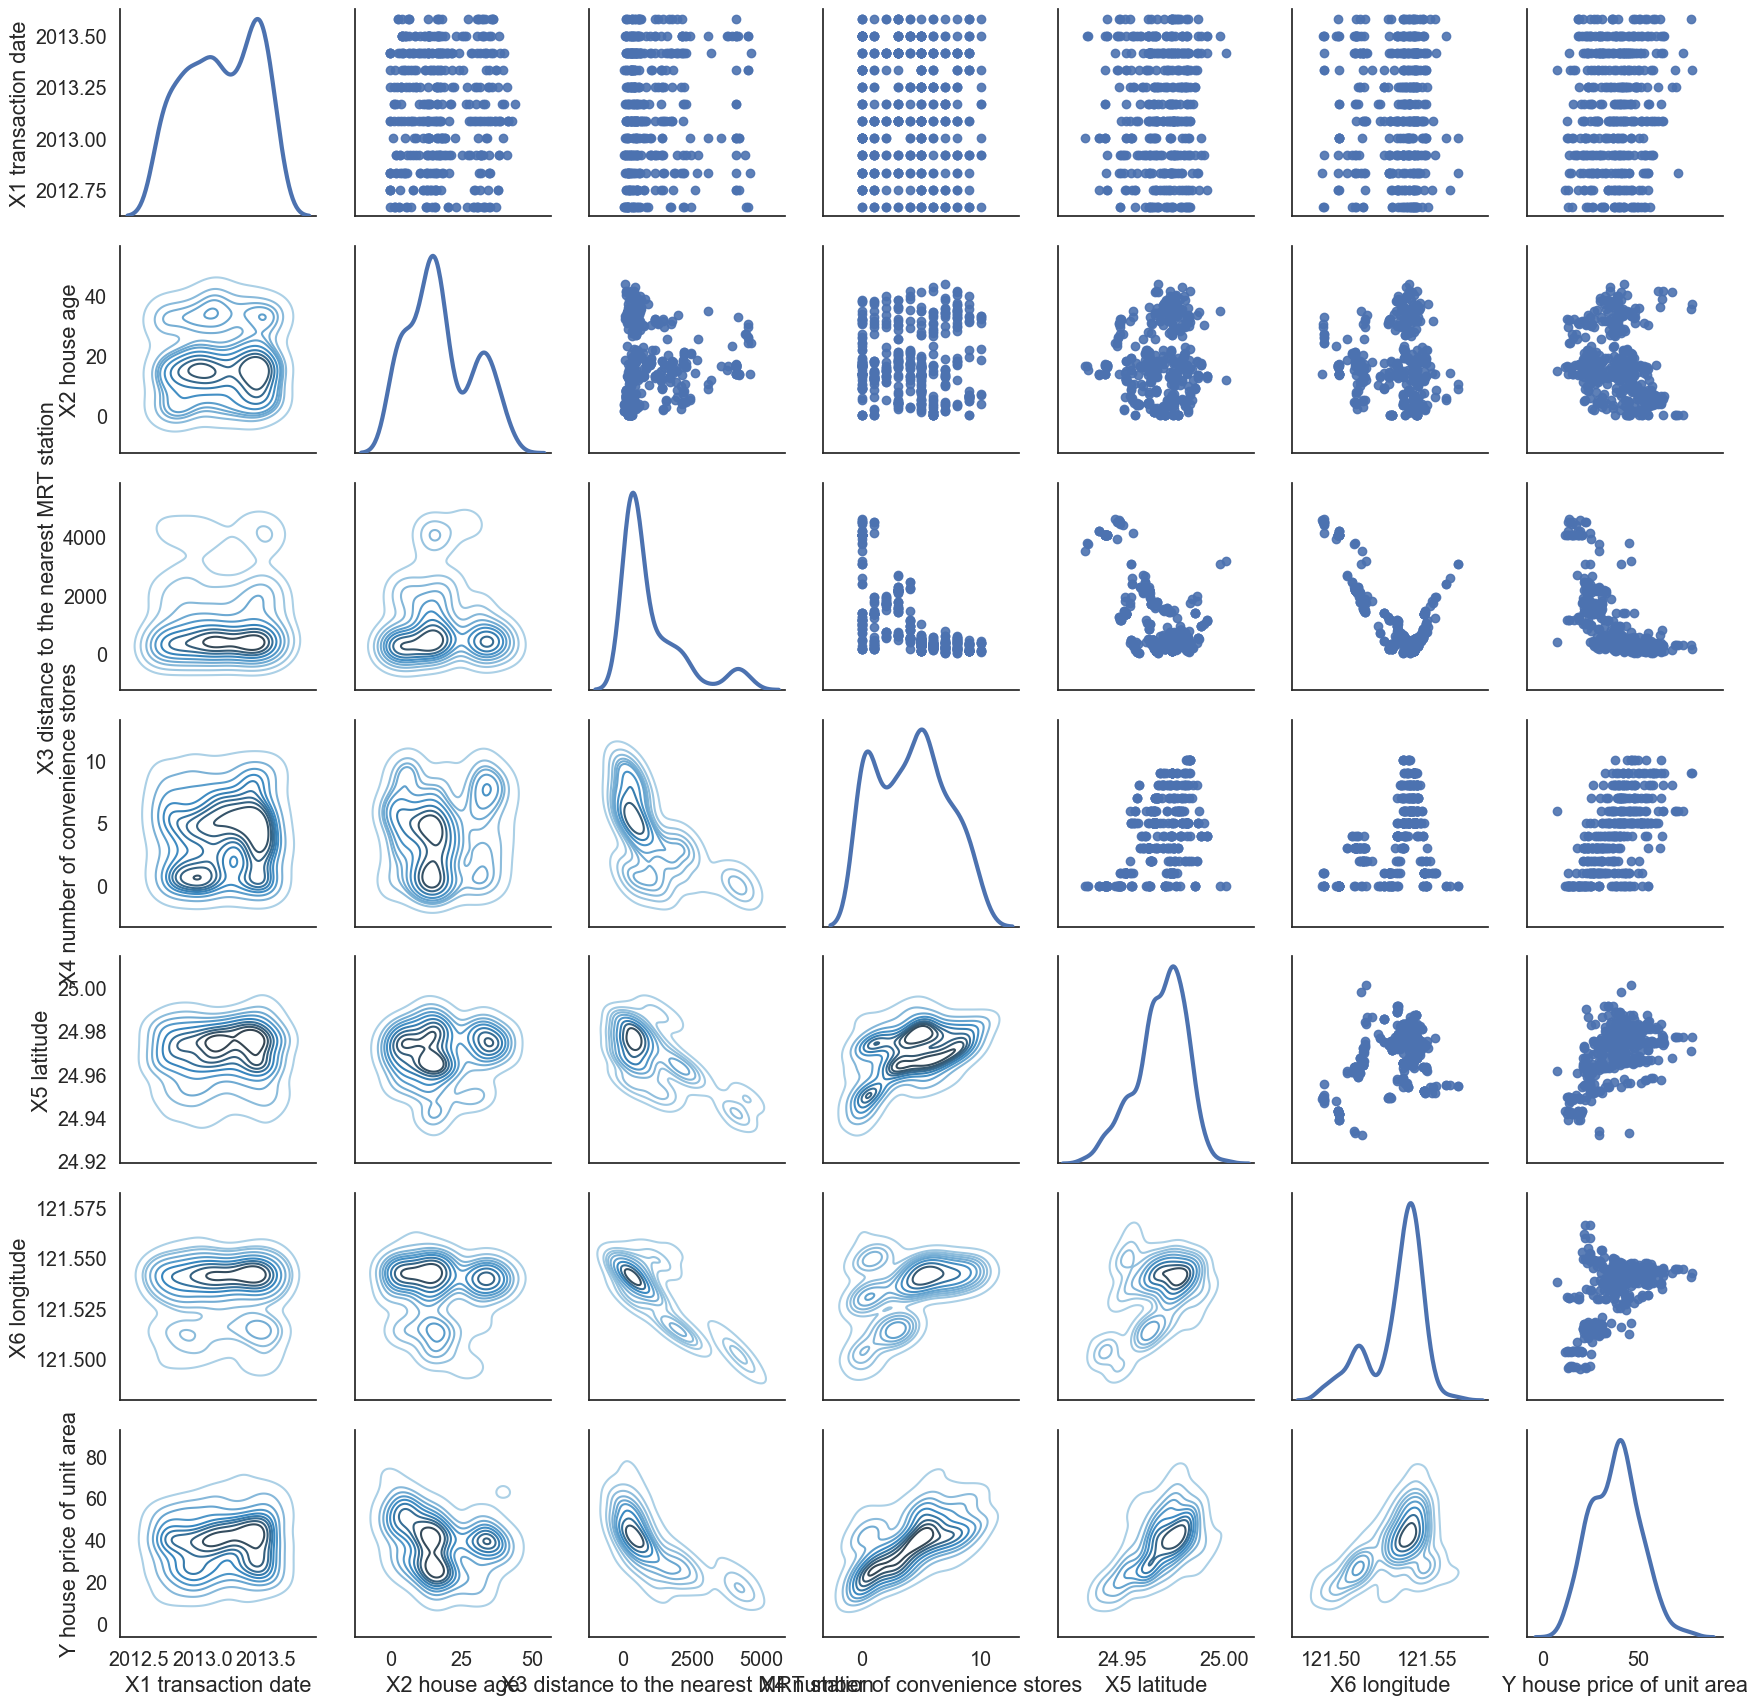

In [50]:
sns.set(style='white', font_scale=1.3)

g = sns.PairGrid(filt_data, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.9)
g.map_diag(sns.kdeplot, lw=3);

# Проведем тесты на нормальность по Пирсону

In [68]:
stat, p = stats.normaltest(filt_data['X2 house age'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=53.514, p-value=0.000
Отклонить гипотезу о нормальности


In [65]:
stat, p = stats.normaltest(filt_data['Y house price of unit area'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=3.138, p-value=0.208
Принять гипотезу о нормальности


На нормальность прошел тест для стоимости. Для всех остальных данных тест не прошел (сюда не включил, чтобы не загромождать)

# Вывод

Из полученных данных можно заметить, что между собой кореллируют данные по расположению к метро, координатам, количеством магазинов в пешей доступности и стоимости. Получили отрицательную корелляцию (чем ближе к метро, тем стоимость квартир выше, а также больше магазинов :)) Есть также слабая зависимость между стоимостью жилья и количеством магазинов в округе. Также можно предположить, что в центре Нового Тайбэя количество станций больше и кучнее, чем на окраине)
Тест на нормальность (по Пирсону) прошли только данные о стоимости жилья.